In [2]:
%matplotlib inline
import sys
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import pylab as plt
import math
from itertools import chain
#import matplotlib.cm as cm
import statsmodels.api as sm
from os import listdir
import random
from copy import deepcopy
import time
import matplotlib.cm as cm
from numpy.random import choice
import itertools
import operator
import matplotlib.mlab as mlab
import re

## Occupations Burst Plot

### Load sci2 Burst Data

In [28]:
occ = pd.read_csv('outpatient-burst-analysis.csv', 
                          encoding='latin1', sep=",")
# uncomment to run burst visulization for hospital or residential
#occ = pd.read_csv('residential-burst-analysis.csv', 
  #                        encoding='latin1', sep=",")        
#occ = pd.read_csv('hospital-burst-analysis.csv', 
   #                       encoding='latin1', sep=",")  

In [29]:
occ['Word'] = occ['Word'].str.replace('_',' ')

### Top 15 occupations

In [31]:
occ_top={}

# sum weight and pick top15
for i in occ.index:
    word=occ['Word'][i]
    weight=occ['Weight'][i]
    start=occ['Start'][i]
    end=occ['End'][i]
    occ_top[word]=[weight,start,end]

occ_df=pd.DataFrame.from_dict(occ_top,
                       orient='index', columns=['sum_weight', 'first_start','end'])

occ_topdf=occ_df.sort_values(ascending=[False],by=['sum_weight'])[0:15] 

In [33]:
occ_topdf=occ_topdf.sort_values(ascending=[True,True,False],by=['first_start','end','sum_weight'])
occ_topdf=occ_topdf.reset_index()

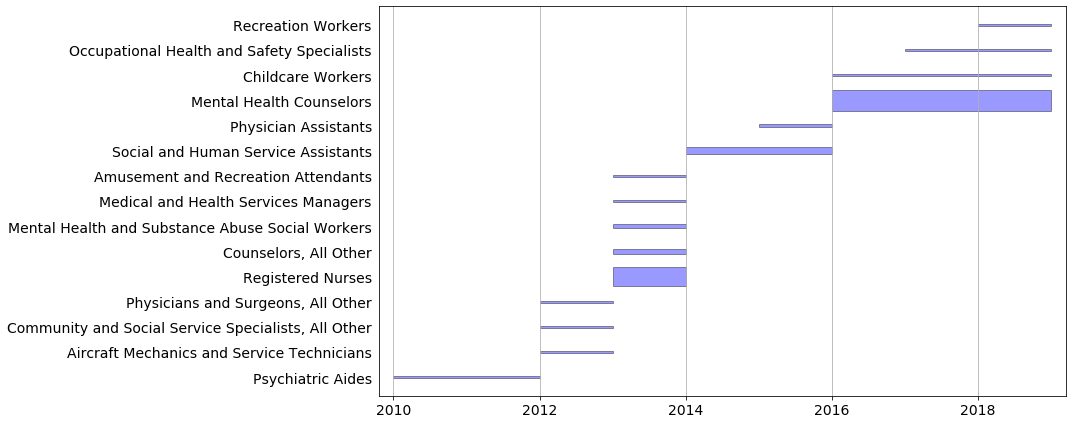

In [35]:

plt.rcParams['svg.fonttype'] = 'none'
fig = plt.figure(figsize=(15, 6),facecolor='white')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
#end = np.array(df[['stop']])
ax1 = fig.add_subplot(111)
ax1.xaxis.grid()
ax1.set_xlim((2009.8, 2019.2))
ax1.barh(range(len(occ_topdf.first_start)),  occ_topdf.end-occ_topdf.first_start+1, 
         left=occ_topdf.first_start, color="blue",alpha=0.4, edgecolor = "black",
         height=occ_topdf.sum_weight/max(occ_topdf.sum_weight)*0.8+0.03)

ax1.yaxis.set_ticks_position('none')

my_yticks=occ_topdf["index"]
y = list(range(0, len(my_yticks)))

plt.yticks(y, my_yticks)
fig.tight_layout()
plt.show()